## Introduction

This document is to describe mSPRT(mixture sequential probability ratio test) proposed in Optimizely's paper[1].

## One-sample mSPRT

For a sigle stream of data $X_{1},...., X_{n}$ from a distribution with mean = $\theta$, we want to test the following hypotheses:

$$H_{0}: \theta = \theta_{0}$$
$$H_{a}: \theta \neq \theta_{0}$$

The test is defined by a mixing distribution $H$ over $\Theta$, where $H$ is assumed to have a density $h$ that is positive everywhere. Using $H$, we first compute the following mixture of likelihood ratios against the null hypthesis that $\theta = \theta_{0}$:

$$\Lambda^{H, \theta_{0}}_{n} = \int_{\Theta} \prod^{n}_{m=1} \frac{f_{\theta}(X_{m})}{f_{\theta_{0}}(X_{m})} h(\theta) d\theta $$

Given a desired false postivie probablity $\alpha$, it stops and rejects the null hypothesis at the first time $T = T^{H}(\alpha)$ that $\Lambda^{H, \theta_{0}}_{n} > \alpha^{-1}$; if no such time exists, it never rejects the null hypothesis. Using standard martingale techniques, it can be shown that this sequential test control Type I error at level $\alpha$. 

For data generated by general exponential families, as long as an appropriate conjugate prior is chosen as $H$, computation of $\Lambda^{H, \theta_{0}}_{n}$ (and thus both always valid p-values and always valid confidence intervals) is inexpensive. For example, for data generated from a normal distribution(i.e. where $F_{\theta} = N(\theta, \sigma^{2}$)), it turns out that if we use a normal mixing distribution centered at the null hypothesis(i.e., $H = N(\theta_{0}, \tau^2)$, then we obtain a closed form formula for $\Lambda^{H,\theta_{0}}_{n}$:

$$\Lambda^{H,\theta_{0}}_{n} = \sqrt{\frac{V_{n}}{V_{n}+\tau}} exp \{ \frac{\tau }{2V_{n}(V_{n}+\tau)}(\overline{X}_{n} - \theta_{0})^{2}\},\ \ where\ V_{n} = \frac{\sigma^{2}}{n} \ \ \ \ \ (1)$$ [1]

## Always valid p-value process

The authors of Optimizely's papers define always valid p-value process as follows:


>A sequence of p-values ($p_{n}$) is an always valid p-value process if given any stopping time $T$, there holds:  
>  
>$$\forall \alpha \in [0, 1], P_{\theta_{0}}(p_{T} \le \alpha) \le \alpha $$


For a given mSPRT $\Lambda^{H, \theta_{0}}_{n}$ sequence, it can be shown that $p_{n}$ satisifying the following simple recursion is an always valid p-value process:  
  
$$p_{0} = 1; p_{n} = min \{ p_{n-1}, 1/{\Lambda^{H, \theta_{0}}_{n}}\}$$ [1]

## Always valid confidence interval process

The authro also define always valid confidence interval process as follows:

>A sequence of (1- $\alpha$)-level confidence intervals ($I_{n}$) is an always valid confidence interval process if for any stopping time $T$, the corresponding interval $I_{T}$ has $1 - \alpha$ coverage of the true parameter: 
>  
>$$\forall \theta \in \Theta, P_{\theta}(\theta \in I_{T}) \ge 1- \alpha $$


For a given mSPRT $\Lambda^{H, \theta_{0}}_{n}$ sequence, it also can be shown that $I_{n}$ satisifying the following simple recursion is an always valid confidence interval process:  

$$I_{0} = \Theta; I_{n} = I_{n-1} \cap \{\theta: \Lambda^{H, \theta}_{n} \ge \alpha^{-1}\}$$ [1]

## Two-sample mSPRT

To get an mSPRT for A/B testing, we need to define a mixture likelihood ratio ${\Lambda^{H, \theta_{0}}_{n}}$ for two-variation experiments, as a fuction of the data $X_{1},...., X_{n}, Y_{1},... Y_{n}$. We start by considering normal data. In this case, note that for any $\mu^{A}$ and $\mu^{B}$, $Z_{n} = Y_{n} - X_{n}$. We can thus simply apply the one-variation mSPRT to the sequence {$Z_{n}$}; The equation (1) continues to hold for this case. We only need to set $\ V_{n} = \frac{2\sigma^{2}}{n}$. 

$V_{n} = \frac{\overline{X}_{n}(1-\overline{X}_{n})}{n}+\frac{\overline{Y}_{n}(1-\overline{Y}_{n})}{n}$

Simulation shows T continues to work

$$\Lambda^{H,\theta_{0}}_{T} = \sqrt{\frac{V_{T}}{V_{T}+\tau}} exp \{ \frac{\tau }{2V_{T}(V_{T}+\tau)}\hat{\theta}^{2}_{T} \},\ \ where\ V_{T} = \frac{\overline{X}_{n}(1-\overline{X}_{n})}{n}+\frac{\overline{Y}_{m}(1-\overline{Y}_{m})}{m} $$


## Choice of $\tau$ parameter

Uber's paper suggests to use $\overline{\delta}^{2}$ i.e. the square of observed effect size for $\tau$. That is, $H = N(0, \overline{\delta}^{2})$

[2]

## Sample size estimation

Uber's paper offers the following formula to estimate the average sample size to have the power 1:

$E[N_{\delta}] = \frac{v_{x}+v_{y}}{\delta^{2}}\{log(-2\ log(\alpha)) - 2\ log(\alpha)\}$, where $\delta$ is the effect size.

[2]

## Simulation

In [23]:
import sys
sys.path.append('/Users/thuan/Projects/xp-algorithms/sequential-testing/')
import numpy as np
import util.helper as helper
import util.msprt_core as msprt_core
import util.sim_msprt as sim_msprt

### Type 1 error control

In [25]:
ss = helper.sample_size(mu=0.2, mde_value=0.02, pr=True)

Sample size for mu=0.2000, relative_mde_value=0.0200, absolute_mde_value=0.0040, alpha=0.0500, beta=0.0500:
variant_sample_size=261,830, total_sample_size=523,661


In [2]:
np.random.seed(2018)
ss = helper.sample_size(mu=0.2, mde_value=0.02, pr=True)
sim_data1 = sim_msprt.sim_peeking(muA=0.20, muB=0.20, sample_size=ss['variant_sample_size'], 
                                  n_experiments=1000, n_peeks=1000, start=7500, alpha=0.05)

Sample size for mu=0.2000, relative_mde_value=0.0200, absolute_mde_value=0.0040, alpha=0.0500, beta=0.0500:
variant_sample_size=261,830, total_sample_size=523,661
[Start time]: 2019-12-19 22:28:46
[Parameters]: muA: 0.2, muB: 0.2, sample_size: 261,830, n_experiments: 1,000, relative_mde_value: 0.02000, alpha: 0.050, n_peeks: 1,000, start: 7,500, step: 254
[12-19 22:28:56]: Peek #1 @ 7,500 samples, avg_effect: 0.02101, msprt_res: {'U': 993, 'B': 5, 'A': 2}
[12-19 22:28:56]: Peek #2 @ 7,754 samples, avg_effect: 0.00000, msprt_res: {'U': 993, 'B': 5, 'A': 2}
[12-19 22:28:56]: Peek #3 @ 8,008 samples, avg_effect: 0.00000, msprt_res: {'U': 993, 'B': 5, 'A': 2}
[12-19 22:28:56]: Peek #4 @ 8,262 samples, avg_effect: 0.00000, msprt_res: {'U': 993, 'B': 5, 'A': 2}
[12-19 22:28:56]: Peek #5 @ 8,516 samples, avg_effect: 0.00000, msprt_res: {'U': 993, 'B': 5, 'A': 2}
[12-19 22:28:56]: Peek #6 @ 8,770 samples, avg_effect: 0.00000, msprt_res: {'U': 993, 'B': 5, 'A': 2}
[12-19 22:28:56]: Peek #7 @ 9,

[12-19 22:28:57]: Peek #81 @ 27,820 samples, avg_effect: 0.00000, msprt_res: {'U': 982, 'B': 13, 'A': 5}
[12-19 22:28:57]: Peek #82 @ 28,074 samples, avg_effect: 0.00000, msprt_res: {'U': 982, 'B': 13, 'A': 5}
[12-19 22:28:57]: Peek #83 @ 28,328 samples, avg_effect: 0.00000, msprt_res: {'U': 982, 'B': 13, 'A': 5}
[12-19 22:28:57]: Peek #84 @ 28,582 samples, avg_effect: 0.00000, msprt_res: {'U': 982, 'B': 13, 'A': 5}
[12-19 22:28:57]: Peek #85 @ 28,836 samples, avg_effect: 0.00000, msprt_res: {'U': 982, 'B': 13, 'A': 5}
[12-19 22:28:57]: Peek #86 @ 29,090 samples, avg_effect: 0.00000, msprt_res: {'U': 982, 'B': 13, 'A': 5}
[12-19 22:28:57]: Peek #87 @ 29,344 samples, avg_effect: 0.00000, msprt_res: {'U': 982, 'B': 13, 'A': 5}
[12-19 22:28:57]: Peek #88 @ 29,598 samples, avg_effect: 0.00000, msprt_res: {'U': 982, 'B': 13, 'A': 5}
[12-19 22:28:57]: Peek #89 @ 29,852 samples, avg_effect: 0.00000, msprt_res: {'U': 982, 'B': 13, 'A': 5}
[12-19 22:28:57]: Peek #90 @ 30,106 samples, avg_effect

[12-19 22:28:58]: Peek #172 @ 50,934 samples, avg_effect: 0.00000, msprt_res: {'U': 979, 'B': 16, 'A': 5}
[12-19 22:28:58]: Peek #173 @ 51,188 samples, avg_effect: 0.00000, msprt_res: {'U': 979, 'B': 16, 'A': 5}
[12-19 22:28:58]: Peek #174 @ 51,442 samples, avg_effect: 0.00000, msprt_res: {'U': 979, 'B': 16, 'A': 5}
[12-19 22:28:58]: Peek #175 @ 51,696 samples, avg_effect: 0.00000, msprt_res: {'U': 979, 'B': 16, 'A': 5}
[12-19 22:28:58]: Peek #176 @ 51,950 samples, avg_effect: 0.00000, msprt_res: {'U': 979, 'B': 16, 'A': 5}
[12-19 22:28:58]: Peek #177 @ 52,204 samples, avg_effect: 0.00000, msprt_res: {'U': 979, 'B': 16, 'A': 5}
[12-19 22:28:58]: Peek #178 @ 52,458 samples, avg_effect: 0.00000, msprt_res: {'U': 979, 'B': 16, 'A': 5}
[12-19 22:28:58]: Peek #179 @ 52,712 samples, avg_effect: 0.00000, msprt_res: {'U': 979, 'B': 16, 'A': 5}
[12-19 22:28:58]: Peek #180 @ 52,966 samples, avg_effect: 0.00000, msprt_res: {'U': 979, 'B': 16, 'A': 5}
[12-19 22:28:58]: Peek #181 @ 53,220 samples, 

[12-19 22:28:59]: Peek #255 @ 72,016 samples, avg_effect: 0.00000, msprt_res: {'U': 976, 'B': 17, 'A': 7}
[12-19 22:28:59]: Peek #256 @ 72,270 samples, avg_effect: 0.00000, msprt_res: {'U': 976, 'B': 17, 'A': 7}
[12-19 22:28:59]: Peek #257 @ 72,524 samples, avg_effect: 0.00000, msprt_res: {'U': 976, 'B': 17, 'A': 7}
[12-19 22:28:59]: Peek #258 @ 72,778 samples, avg_effect: 0.00000, msprt_res: {'U': 976, 'B': 17, 'A': 7}
[12-19 22:28:59]: Peek #259 @ 73,032 samples, avg_effect: 0.00000, msprt_res: {'U': 976, 'B': 17, 'A': 7}
[12-19 22:29:00]: Peek #260 @ 73,286 samples, avg_effect: 0.00000, msprt_res: {'U': 976, 'B': 17, 'A': 7}
[12-19 22:29:00]: Peek #261 @ 73,540 samples, avg_effect: 0.00000, msprt_res: {'U': 976, 'B': 17, 'A': 7}
[12-19 22:29:00]: Peek #262 @ 73,794 samples, avg_effect: 0.00000, msprt_res: {'U': 976, 'B': 17, 'A': 7}
[12-19 22:29:00]: Peek #263 @ 74,048 samples, avg_effect: 0.00000, msprt_res: {'U': 976, 'B': 17, 'A': 7}
[12-19 22:29:00]: Peek #264 @ 74,302 samples, 

[12-19 22:29:01]: Peek #344 @ 94,622 samples, avg_effect: 0.00000, msprt_res: {'U': 974, 'B': 17, 'A': 9}
[12-19 22:29:01]: Peek #345 @ 94,876 samples, avg_effect: 0.00000, msprt_res: {'U': 974, 'B': 17, 'A': 9}
[12-19 22:29:01]: Peek #346 @ 95,130 samples, avg_effect: 0.00000, msprt_res: {'U': 974, 'B': 17, 'A': 9}
[12-19 22:29:01]: Peek #347 @ 95,384 samples, avg_effect: 0.00563, msprt_res: {'U': 973, 'B': 18, 'A': 9}
[12-19 22:29:01]: Peek #348 @ 95,638 samples, avg_effect: 0.00000, msprt_res: {'U': 973, 'B': 18, 'A': 9}
[12-19 22:29:01]: Peek #349 @ 95,892 samples, avg_effect: 0.00000, msprt_res: {'U': 973, 'B': 18, 'A': 9}
[12-19 22:29:01]: Peek #350 @ 96,146 samples, avg_effect: 0.00000, msprt_res: {'U': 973, 'B': 18, 'A': 9}
[12-19 22:29:01]: Peek #351 @ 96,400 samples, avg_effect: 0.00000, msprt_res: {'U': 973, 'B': 18, 'A': 9}
[12-19 22:29:01]: Peek #352 @ 96,654 samples, avg_effect: 0.00000, msprt_res: {'U': 973, 'B': 18, 'A': 9}
[12-19 22:29:01]: Peek #353 @ 96,908 samples, 

[12-19 22:29:02]: Peek #427 @ 115,704 samples, avg_effect: 0.00000, msprt_res: {'U': 972, 'B': 19, 'A': 9}
[12-19 22:29:02]: Peek #428 @ 115,958 samples, avg_effect: 0.00000, msprt_res: {'U': 972, 'B': 19, 'A': 9}
[12-19 22:29:02]: Peek #429 @ 116,212 samples, avg_effect: 0.00000, msprt_res: {'U': 972, 'B': 19, 'A': 9}
[12-19 22:29:02]: Peek #430 @ 116,466 samples, avg_effect: 0.00000, msprt_res: {'U': 972, 'B': 19, 'A': 9}
[12-19 22:29:02]: Peek #431 @ 116,720 samples, avg_effect: 0.00000, msprt_res: {'U': 972, 'B': 19, 'A': 9}
[12-19 22:29:02]: Peek #432 @ 116,974 samples, avg_effect: 0.00000, msprt_res: {'U': 972, 'B': 19, 'A': 9}
[12-19 22:29:02]: Peek #433 @ 117,228 samples, avg_effect: 0.00000, msprt_res: {'U': 972, 'B': 19, 'A': 9}
[12-19 22:29:02]: Peek #434 @ 117,482 samples, avg_effect: 0.00501, msprt_res: {'U': 971, 'B': 19, 'A': 10}
[12-19 22:29:02]: Peek #435 @ 117,736 samples, avg_effect: 0.00000, msprt_res: {'U': 971, 'B': 19, 'A': 10}
[12-19 22:29:02]: Peek #436 @ 117,9

[12-19 22:29:04]: Peek #508 @ 136,278 samples, avg_effect: 0.00000, msprt_res: {'U': 970, 'B': 19, 'A': 11}
[12-19 22:29:04]: Peek #509 @ 136,532 samples, avg_effect: 0.00000, msprt_res: {'U': 970, 'B': 19, 'A': 11}
[12-19 22:29:04]: Peek #510 @ 136,786 samples, avg_effect: 0.00000, msprt_res: {'U': 970, 'B': 19, 'A': 11}
[12-19 22:29:04]: Peek #511 @ 137,040 samples, avg_effect: 0.00000, msprt_res: {'U': 970, 'B': 19, 'A': 11}
[12-19 22:29:04]: Peek #512 @ 137,294 samples, avg_effect: 0.00000, msprt_res: {'U': 970, 'B': 19, 'A': 11}
[12-19 22:29:04]: Peek #513 @ 137,548 samples, avg_effect: 0.00000, msprt_res: {'U': 970, 'B': 19, 'A': 11}
[12-19 22:29:04]: Peek #514 @ 137,802 samples, avg_effect: 0.00000, msprt_res: {'U': 970, 'B': 19, 'A': 11}
[12-19 22:29:04]: Peek #515 @ 138,056 samples, avg_effect: 0.00000, msprt_res: {'U': 970, 'B': 19, 'A': 11}
[12-19 22:29:04]: Peek #516 @ 138,310 samples, avg_effect: 0.00000, msprt_res: {'U': 970, 'B': 19, 'A': 11}
[12-19 22:29:04]: Peek #517 

[12-19 22:29:05]: Peek #584 @ 155,582 samples, avg_effect: 0.00000, msprt_res: {'U': 968, 'B': 19, 'A': 13}
[12-19 22:29:05]: Peek #585 @ 155,836 samples, avg_effect: 0.00000, msprt_res: {'U': 968, 'B': 19, 'A': 13}
[12-19 22:29:05]: Peek #586 @ 156,090 samples, avg_effect: 0.00000, msprt_res: {'U': 968, 'B': 19, 'A': 13}
[12-19 22:29:05]: Peek #587 @ 156,344 samples, avg_effect: 0.00000, msprt_res: {'U': 968, 'B': 19, 'A': 13}
[12-19 22:29:05]: Peek #588 @ 156,598 samples, avg_effect: 0.00000, msprt_res: {'U': 968, 'B': 19, 'A': 13}
[12-19 22:29:05]: Peek #589 @ 156,852 samples, avg_effect: 0.00000, msprt_res: {'U': 968, 'B': 19, 'A': 13}
[12-19 22:29:05]: Peek #590 @ 157,106 samples, avg_effect: 0.00000, msprt_res: {'U': 968, 'B': 19, 'A': 13}
[12-19 22:29:05]: Peek #591 @ 157,360 samples, avg_effect: 0.00000, msprt_res: {'U': 968, 'B': 19, 'A': 13}
[12-19 22:29:05]: Peek #592 @ 157,614 samples, avg_effect: 0.00000, msprt_res: {'U': 968, 'B': 19, 'A': 13}
[12-19 22:29:05]: Peek #593 

[12-19 22:29:06]: Peek #667 @ 176,664 samples, avg_effect: 0.00000, msprt_res: {'U': 968, 'B': 19, 'A': 13}
[12-19 22:29:06]: Peek #668 @ 176,918 samples, avg_effect: 0.00000, msprt_res: {'U': 968, 'B': 19, 'A': 13}
[12-19 22:29:06]: Peek #669 @ 177,172 samples, avg_effect: 0.00413, msprt_res: {'U': 967, 'B': 19, 'A': 14}
[12-19 22:29:06]: Peek #670 @ 177,426 samples, avg_effect: 0.00000, msprt_res: {'U': 967, 'B': 19, 'A': 14}
[12-19 22:29:06]: Peek #671 @ 177,680 samples, avg_effect: 0.00000, msprt_res: {'U': 967, 'B': 19, 'A': 14}
[12-19 22:29:06]: Peek #672 @ 177,934 samples, avg_effect: 0.00410, msprt_res: {'U': 966, 'B': 19, 'A': 15}
[12-19 22:29:06]: Peek #673 @ 178,188 samples, avg_effect: 0.00000, msprt_res: {'U': 966, 'B': 19, 'A': 15}
[12-19 22:29:06]: Peek #674 @ 178,442 samples, avg_effect: 0.00000, msprt_res: {'U': 966, 'B': 19, 'A': 15}
[12-19 22:29:06]: Peek #675 @ 178,696 samples, avg_effect: 0.00000, msprt_res: {'U': 966, 'B': 19, 'A': 15}
[12-19 22:29:06]: Peek #676 

[12-19 22:29:08]: Peek #743 @ 195,968 samples, avg_effect: 0.00000, msprt_res: {'U': 964, 'B': 20, 'A': 16}
[12-19 22:29:08]: Peek #744 @ 196,222 samples, avg_effect: 0.00000, msprt_res: {'U': 964, 'B': 20, 'A': 16}
[12-19 22:29:08]: Peek #745 @ 196,476 samples, avg_effect: 0.00000, msprt_res: {'U': 964, 'B': 20, 'A': 16}
[12-19 22:29:08]: Peek #746 @ 196,730 samples, avg_effect: 0.00000, msprt_res: {'U': 964, 'B': 20, 'A': 16}
[12-19 22:29:08]: Peek #747 @ 196,984 samples, avg_effect: 0.00000, msprt_res: {'U': 964, 'B': 20, 'A': 16}
[12-19 22:29:08]: Peek #748 @ 197,238 samples, avg_effect: 0.00000, msprt_res: {'U': 964, 'B': 20, 'A': 16}
[12-19 22:29:08]: Peek #749 @ 197,492 samples, avg_effect: 0.00000, msprt_res: {'U': 964, 'B': 20, 'A': 16}
[12-19 22:29:08]: Peek #750 @ 197,746 samples, avg_effect: 0.00000, msprt_res: {'U': 964, 'B': 20, 'A': 16}
[12-19 22:29:08]: Peek #751 @ 198,000 samples, avg_effect: 0.00000, msprt_res: {'U': 964, 'B': 20, 'A': 16}
[12-19 22:29:08]: Peek #752 

[12-19 22:29:09]: Peek #828 @ 217,558 samples, avg_effect: 0.00000, msprt_res: {'U': 963, 'B': 20, 'A': 17}
[12-19 22:29:09]: Peek #829 @ 217,812 samples, avg_effect: 0.00000, msprt_res: {'U': 963, 'B': 20, 'A': 17}
[12-19 22:29:09]: Peek #830 @ 218,066 samples, avg_effect: 0.00000, msprt_res: {'U': 963, 'B': 20, 'A': 17}
[12-19 22:29:09]: Peek #831 @ 218,320 samples, avg_effect: 0.00000, msprt_res: {'U': 963, 'B': 20, 'A': 17}
[12-19 22:29:09]: Peek #832 @ 218,574 samples, avg_effect: 0.00000, msprt_res: {'U': 963, 'B': 20, 'A': 17}
[12-19 22:29:09]: Peek #833 @ 218,828 samples, avg_effect: 0.00000, msprt_res: {'U': 963, 'B': 20, 'A': 17}
[12-19 22:29:09]: Peek #834 @ 219,082 samples, avg_effect: 0.00000, msprt_res: {'U': 963, 'B': 20, 'A': 17}
[12-19 22:29:09]: Peek #835 @ 219,336 samples, avg_effect: 0.00000, msprt_res: {'U': 963, 'B': 20, 'A': 17}
[12-19 22:29:09]: Peek #836 @ 219,590 samples, avg_effect: 0.00000, msprt_res: {'U': 963, 'B': 20, 'A': 17}
[12-19 22:29:09]: Peek #837 

[12-19 22:29:10]: Peek #912 @ 238,894 samples, avg_effect: 0.00000, msprt_res: {'U': 962, 'B': 21, 'A': 17}
[12-19 22:29:10]: Peek #913 @ 239,148 samples, avg_effect: 0.00000, msprt_res: {'U': 962, 'B': 21, 'A': 17}
[12-19 22:29:10]: Peek #914 @ 239,402 samples, avg_effect: 0.00000, msprt_res: {'U': 962, 'B': 21, 'A': 17}
[12-19 22:29:10]: Peek #915 @ 239,656 samples, avg_effect: 0.00000, msprt_res: {'U': 962, 'B': 21, 'A': 17}
[12-19 22:29:10]: Peek #916 @ 239,910 samples, avg_effect: 0.00000, msprt_res: {'U': 962, 'B': 21, 'A': 17}
[12-19 22:29:10]: Peek #917 @ 240,164 samples, avg_effect: 0.00000, msprt_res: {'U': 962, 'B': 21, 'A': 17}
[12-19 22:29:10]: Peek #918 @ 240,418 samples, avg_effect: 0.00000, msprt_res: {'U': 962, 'B': 21, 'A': 17}
[12-19 22:29:10]: Peek #919 @ 240,672 samples, avg_effect: 0.00000, msprt_res: {'U': 962, 'B': 21, 'A': 17}
[12-19 22:29:10]: Peek #920 @ 240,926 samples, avg_effect: 0.00000, msprt_res: {'U': 962, 'B': 21, 'A': 17}
[12-19 22:29:10]: Peek #921 

[12-19 22:29:11]: Peek #994 @ 259,722 samples, avg_effect: 0.00000, msprt_res: {'U': 959, 'B': 23, 'A': 18}
[12-19 22:29:11]: Peek #995 @ 259,976 samples, avg_effect: 0.00000, msprt_res: {'U': 959, 'B': 23, 'A': 18}
[12-19 22:29:11]: Peek #996 @ 260,230 samples, avg_effect: 0.00000, msprt_res: {'U': 959, 'B': 23, 'A': 18}
[12-19 22:29:11]: Peek #997 @ 260,484 samples, avg_effect: 0.00000, msprt_res: {'U': 959, 'B': 23, 'A': 18}
[12-19 22:29:11]: Peek #998 @ 260,738 samples, avg_effect: 0.00000, msprt_res: {'U': 959, 'B': 23, 'A': 18}
[12-19 22:29:11]: Peek #999 @ 260,992 samples, avg_effect: 0.00000, msprt_res: {'U': 959, 'B': 23, 'A': 18}
[12-19 22:29:11]: Peek #1000 @ 261,246 samples, avg_effect: 0.00000, msprt_res: {'U': 959, 'B': 23, 'A': 18}
[12-19 22:29:11]: Peek #1001 @ 261,500 samples, avg_effect: 0.00000, msprt_res: {'U': 959, 'B': 23, 'A': 18}
[12-19 22:29:12]: Peek #1002 @ 261,754 samples, avg_effect: 0.00000, msprt_res: {'U': 959, 'B': 23, 'A': 18}
[Parameters]: muA: 0.2, m

### Power analysis

In [2]:
_ = msprt_core.estimate_sample_size(mu=0.2, relative_mde_value=0.02, alpha=0.05)

muA: 0.20000, muB: 0.20400, relative_mde_value: 0.02000, sample_size: 156,795


In [27]:
np.random.seed(2018)
np.seterr('raise')
sim_data1 = sim_msprt.sim_peeking(muA=0.20, muB=0.204, sample_size=800000, 
                                  n_experiments=1000, n_peeks=1000, start=26183, alpha=0.05)

[Start time]: 2019-12-20 13:12:18
[Parameters]: muA: 0.2, muB: 0.204, sample_size: 800,000, n_experiments: 1,000, relative_mde_value: 0.02000, alpha: 0.050, n_peeks: 1,000, start: 26,183, step: 774
[12-20 13:12:51]: Peek #1 @ 26,183 samples, avg_effect: 0.01177, msprt_res: {'U': 982, 'B': 18}
[12-20 13:12:51]: Peek #2 @ 26,957 samples, avg_effect: 0.01079, msprt_res: {'U': 980, 'B': 20}
[12-20 13:12:51]: Peek #3 @ 27,731 samples, avg_effect: 0.01094, msprt_res: {'U': 977, 'B': 23}
[12-20 13:12:51]: Peek #4 @ 28,505 samples, avg_effect: 0.01034, msprt_res: {'U': 971, 'B': 29}
[12-20 13:12:51]: Peek #5 @ 29,279 samples, avg_effect: 0.01035, msprt_res: {'U': 965, 'B': 35}
[12-20 13:12:51]: Peek #6 @ 30,053 samples, avg_effect: 0.01026, msprt_res: {'U': 960, 'B': 40}
[12-20 13:12:51]: Peek #7 @ 30,827 samples, avg_effect: 0.01020, msprt_res: {'U': 957, 'B': 43}
[12-20 13:12:51]: Peek #8 @ 31,601 samples, avg_effect: 0.00988, msprt_res: {'U': 954, 'B': 46}
[12-20 13:12:51]: Peek #9 @ 32,375

[12-20 13:12:53]: Peek #88 @ 93,521 samples, avg_effect: 0.00574, msprt_res: {'U': 703, 'B': 297}
[12-20 13:12:53]: Peek #89 @ 94,295 samples, avg_effect: 0.00569, msprt_res: {'U': 701, 'B': 299}
[12-20 13:12:53]: Peek #90 @ 95,069 samples, avg_effect: 0.00576, msprt_res: {'U': 697, 'B': 303}
[12-20 13:12:53]: Peek #91 @ 95,843 samples, avg_effect: 0.00567, msprt_res: {'U': 693, 'B': 307}
[12-20 13:12:53]: Peek #92 @ 96,617 samples, avg_effect: 0.00563, msprt_res: {'U': 690, 'B': 310}
[12-20 13:12:53]: Peek #93 @ 97,391 samples, avg_effect: 0.00564, msprt_res: {'U': 687, 'B': 313}
[12-20 13:12:53]: Peek #94 @ 98,165 samples, avg_effect: 0.00000, msprt_res: {'U': 687, 'B': 313}
[12-20 13:12:53]: Peek #95 @ 98,939 samples, avg_effect: 0.00555, msprt_res: {'U': 681, 'B': 319}
[12-20 13:12:53]: Peek #96 @ 99,713 samples, avg_effect: 0.00556, msprt_res: {'U': 677, 'B': 323}
[12-20 13:12:53]: Peek #97 @ 100,487 samples, avg_effect: 0.00551, msprt_res: {'U': 673, 'B': 327}
[12-20 13:12:53]: P

[12-20 13:12:54]: Peek #187 @ 170,147 samples, avg_effect: 0.00421, msprt_res: {'B': 580, 'U': 420}
[12-20 13:12:54]: Peek #188 @ 170,921 samples, avg_effect: 0.00423, msprt_res: {'B': 583, 'U': 417}
[12-20 13:12:54]: Peek #189 @ 171,695 samples, avg_effect: 0.00423, msprt_res: {'B': 586, 'U': 414}
[12-20 13:12:54]: Peek #190 @ 172,469 samples, avg_effect: 0.00419, msprt_res: {'B': 588, 'U': 412}
[12-20 13:12:54]: Peek #191 @ 173,243 samples, avg_effect: 0.00416, msprt_res: {'B': 590, 'U': 410}
[12-20 13:12:54]: Peek #192 @ 174,017 samples, avg_effect: 0.00424, msprt_res: {'B': 593, 'U': 407}
[12-20 13:12:54]: Peek #193 @ 174,791 samples, avg_effect: 0.00418, msprt_res: {'B': 596, 'U': 404}
[12-20 13:12:54]: Peek #194 @ 175,565 samples, avg_effect: 0.00418, msprt_res: {'B': 597, 'U': 403}
[12-20 13:12:54]: Peek #195 @ 176,339 samples, avg_effect: 0.00000, msprt_res: {'B': 597, 'U': 403}
[12-20 13:12:54]: Peek #196 @ 177,113 samples, avg_effect: 0.00410, msprt_res: {'B': 599, 'U': 401}


[12-20 13:12:54]: Peek #274 @ 237,485 samples, avg_effect: 0.00355, msprt_res: {'B': 760, 'U': 240}
[12-20 13:12:54]: Peek #275 @ 238,259 samples, avg_effect: 0.00000, msprt_res: {'B': 760, 'U': 240}
[12-20 13:12:55]: Peek #276 @ 239,033 samples, avg_effect: 0.00357, msprt_res: {'B': 761, 'U': 239}
[12-20 13:12:55]: Peek #277 @ 239,807 samples, avg_effect: 0.00000, msprt_res: {'B': 761, 'U': 239}
[12-20 13:12:55]: Peek #278 @ 240,581 samples, avg_effect: 0.00357, msprt_res: {'B': 765, 'U': 235}
[12-20 13:12:55]: Peek #279 @ 241,355 samples, avg_effect: 0.00356, msprt_res: {'B': 767, 'U': 233}
[12-20 13:12:55]: Peek #280 @ 242,129 samples, avg_effect: 0.00352, msprt_res: {'B': 768, 'U': 232}
[12-20 13:12:55]: Peek #281 @ 242,903 samples, avg_effect: 0.00351, msprt_res: {'B': 769, 'U': 231}
[12-20 13:12:55]: Peek #282 @ 243,677 samples, avg_effect: 0.00353, msprt_res: {'B': 770, 'U': 230}
[12-20 13:12:55]: Peek #283 @ 244,451 samples, avg_effect: 0.00357, msprt_res: {'B': 772, 'U': 228}


[12-20 13:12:55]: Peek #396 @ 331,913 samples, avg_effect: 0.00300, msprt_res: {'B': 902, 'U': 98}
[12-20 13:12:55]: Peek #397 @ 332,687 samples, avg_effect: 0.00000, msprt_res: {'B': 902, 'U': 98}
[12-20 13:12:55]: Peek #398 @ 333,461 samples, avg_effect: 0.00301, msprt_res: {'B': 903, 'U': 97}
[12-20 13:12:55]: Peek #399 @ 334,235 samples, avg_effect: 0.00301, msprt_res: {'B': 905, 'U': 95}
[12-20 13:12:55]: Peek #400 @ 335,009 samples, avg_effect: 0.00000, msprt_res: {'B': 905, 'U': 95}
[12-20 13:12:55]: Peek #401 @ 335,783 samples, avg_effect: 0.00300, msprt_res: {'B': 907, 'U': 93}
[12-20 13:12:55]: Peek #402 @ 336,557 samples, avg_effect: 0.00000, msprt_res: {'B': 907, 'U': 93}
[12-20 13:12:55]: Peek #403 @ 337,331 samples, avg_effect: 0.00000, msprt_res: {'B': 907, 'U': 93}
[12-20 13:12:55]: Peek #404 @ 338,105 samples, avg_effect: 0.00298, msprt_res: {'B': 908, 'U': 92}
[12-20 13:12:55]: Peek #405 @ 338,879 samples, avg_effect: 0.00000, msprt_res: {'B': 908, 'U': 92}
[12-20 13:

[12-20 13:12:55]: Peek #495 @ 408,539 samples, avg_effect: 0.00000, msprt_res: {'B': 954, 'U': 46}
[12-20 13:12:55]: Peek #496 @ 409,313 samples, avg_effect: 0.00272, msprt_res: {'B': 956, 'U': 44}
[12-20 13:12:55]: Peek #497 @ 410,087 samples, avg_effect: 0.00000, msprt_res: {'B': 956, 'U': 44}
[12-20 13:12:55]: Peek #498 @ 410,861 samples, avg_effect: 0.00000, msprt_res: {'B': 956, 'U': 44}
[12-20 13:12:55]: Peek #499 @ 411,635 samples, avg_effect: 0.00000, msprt_res: {'B': 956, 'U': 44}
[12-20 13:12:55]: Peek #500 @ 412,409 samples, avg_effect: 0.00270, msprt_res: {'B': 957, 'U': 43}
[12-20 13:12:55]: Peek #501 @ 413,183 samples, avg_effect: 0.00000, msprt_res: {'B': 957, 'U': 43}
[12-20 13:12:55]: Peek #502 @ 413,957 samples, avg_effect: 0.00000, msprt_res: {'B': 957, 'U': 43}
[12-20 13:12:55]: Peek #503 @ 414,731 samples, avg_effect: 0.00000, msprt_res: {'B': 957, 'U': 43}
[12-20 13:12:55]: Peek #504 @ 415,505 samples, avg_effect: 0.00268, msprt_res: {'B': 960, 'U': 40}
[12-20 13:

[12-20 13:12:56]: Peek #589 @ 481,295 samples, avg_effect: 0.00000, msprt_res: {'B': 978, 'U': 22}
[12-20 13:12:56]: Peek #590 @ 482,069 samples, avg_effect: 0.00000, msprt_res: {'B': 978, 'U': 22}
[12-20 13:12:56]: Peek #591 @ 482,843 samples, avg_effect: 0.00000, msprt_res: {'B': 978, 'U': 22}
[12-20 13:12:56]: Peek #592 @ 483,617 samples, avg_effect: 0.00000, msprt_res: {'B': 978, 'U': 22}
[12-20 13:12:56]: Peek #593 @ 484,391 samples, avg_effect: 0.00000, msprt_res: {'B': 978, 'U': 22}
[12-20 13:12:56]: Peek #594 @ 485,165 samples, avg_effect: 0.00000, msprt_res: {'B': 978, 'U': 22}
[12-20 13:12:56]: Peek #595 @ 485,939 samples, avg_effect: 0.00000, msprt_res: {'B': 978, 'U': 22}
[12-20 13:12:56]: Peek #596 @ 486,713 samples, avg_effect: 0.00000, msprt_res: {'B': 978, 'U': 22}
[12-20 13:12:56]: Peek #597 @ 487,487 samples, avg_effect: 0.00000, msprt_res: {'B': 978, 'U': 22}
[12-20 13:12:56]: Peek #598 @ 488,261 samples, avg_effect: 0.00000, msprt_res: {'B': 978, 'U': 22}
[12-20 13:

[12-20 13:12:56]: Peek #730 @ 590,429 samples, avg_effect: 0.00225, msprt_res: {'B': 992, 'U': 8}
[12-20 13:12:56]: Peek #731 @ 591,203 samples, avg_effect: 0.00000, msprt_res: {'B': 992, 'U': 8}
[12-20 13:12:56]: Peek #732 @ 591,977 samples, avg_effect: 0.00000, msprt_res: {'B': 992, 'U': 8}
[12-20 13:12:56]: Peek #733 @ 592,751 samples, avg_effect: 0.00000, msprt_res: {'B': 992, 'U': 8}
[12-20 13:12:56]: Peek #734 @ 593,525 samples, avg_effect: 0.00000, msprt_res: {'B': 992, 'U': 8}
[12-20 13:12:56]: Peek #735 @ 594,299 samples, avg_effect: 0.00000, msprt_res: {'B': 992, 'U': 8}
[12-20 13:12:56]: Peek #736 @ 595,073 samples, avg_effect: 0.00000, msprt_res: {'B': 992, 'U': 8}
[12-20 13:12:56]: Peek #737 @ 595,847 samples, avg_effect: 0.00000, msprt_res: {'B': 992, 'U': 8}
[12-20 13:12:56]: Peek #738 @ 596,621 samples, avg_effect: 0.00000, msprt_res: {'B': 992, 'U': 8}
[12-20 13:12:56]: Peek #739 @ 597,395 samples, avg_effect: 0.00000, msprt_res: {'B': 992, 'U': 8}
[12-20 13:12:56]: Pe

[12-20 13:12:56]: Peek #897 @ 719,687 samples, avg_effect: 0.00000, msprt_res: {'B': 998, 'U': 2}
[12-20 13:12:56]: Peek #898 @ 720,461 samples, avg_effect: 0.00207, msprt_res: {'B': 999, 'U': 1}
[12-20 13:12:56]: Peek #899 @ 721,235 samples, avg_effect: 0.00000, msprt_res: {'B': 999, 'U': 1}
[12-20 13:12:56]: Peek #900 @ 722,009 samples, avg_effect: 0.00000, msprt_res: {'B': 999, 'U': 1}
[12-20 13:12:56]: Peek #901 @ 722,783 samples, avg_effect: 0.00000, msprt_res: {'B': 999, 'U': 1}
[12-20 13:12:56]: Peek #902 @ 723,557 samples, avg_effect: 0.00000, msprt_res: {'B': 999, 'U': 1}
[12-20 13:12:56]: Peek #903 @ 724,331 samples, avg_effect: 0.00000, msprt_res: {'B': 999, 'U': 1}
[12-20 13:12:56]: Peek #904 @ 725,105 samples, avg_effect: 0.00000, msprt_res: {'B': 999, 'U': 1}
[12-20 13:12:56]: Peek #905 @ 725,879 samples, avg_effect: 0.00000, msprt_res: {'B': 999, 'U': 1}
[12-20 13:12:56]: Peek #906 @ 726,653 samples, avg_effect: 0.00000, msprt_res: {'B': 999, 'U': 1}
[12-20 13:12:56]: Pe

### Backtesting using MM-AG042 data

In [2]:
import numpy as np
import pandas as pd
import util.msprt_core as msprt_core
import matplotlib.pyplot as plt
    
df = pd.read_csv('./backtesting/data/ag042_daily.csv')
df['date2'] = pd.to_datetime(df.date)
print(df.cntr_gen.sum(), df.test_gen.sum(), df.cntr_act.sum(), df.test_act.sum(), df.shape)

421992 423616 23965 23455 (60, 13)


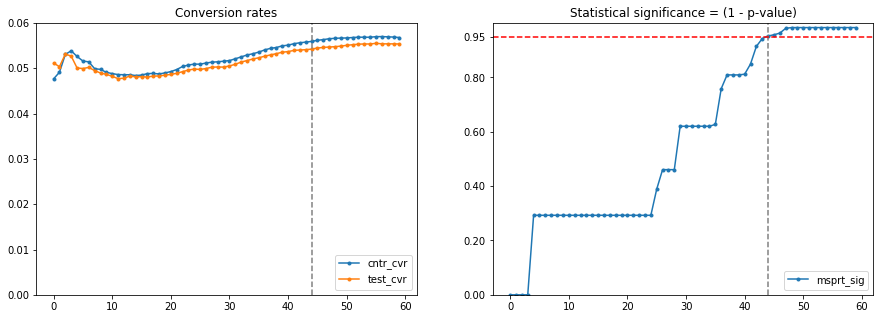

In [4]:
msprt_sig = []
msprt_prev_p_val = 1

for i in range(len(df)):
    
    sa = df.cntr_act_cumu[i]
    na = df.cntr_gen_cumu[i]
    sb = df.test_act_cumu[i]
    nb = df.test_gen_cumu[i]
    
    # MSPRT
    res = msprt_core.calc_stat(sa, na, sb, nb, alpha=0.05, prev_p_value=msprt_prev_p_val)
    msprt_sig.append(1-res['p_value'])
    msprt_prev_p_val = res['p_value']
    
sig_loc = np.where(np.array(msprt_sig)>0.95)[0][0]

# Plot output
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(df.cntr_cvr_cumu, 'o-', markersize=3, label='cntr_cvr')
plt.plot(df.test_cvr_cumu, 'o-', markersize=3, label='test_cvr')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([0,round(max(np.max(df.cntr_cvr_cumu),np.max(df.test_cvr_cumu))*1.1,2)])
plt.title('Conversion rates')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(msprt_sig, 'o-', markersize=3, label='msprt_sig')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([0,1])
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 0.95])
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Statistical significance = (1 - p-value)')
plt.legend(loc='lower right')
plt.show()

## References:
    
[1] R. Johari, P. Koomen, L. Pekelis, and D. Walsh, "Peeking at a/b tests: Why it matters, and what to do about it," in Proceedings of the 23rd ACM SIGKDD International Conference
on Knowledge Discovery and Data Mining. ACM, 2017, pp. 1517–1525.

[2] Z. Zhao, M. Liu, and A. Deb, "Safely and Quickly Deploying New Features with a Staged Rollout Framework Using Sequential Test and Adaptive Experimental Design," in 3rd International Conference on Computational Intelligence and Applications (ICCIA). IEEE, 2018, pp. 59–70.